In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
#create a set of random latitudes and longitude conbinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

625

In [5]:
cities

['bandarbeyla',
 'kapoeta',
 'kensington',
 'ponta delgada',
 'souillac',
 'sorvag',
 'kruisfontein',
 'victoria',
 'roebourne',
 'nalgonda',
 'port alfred',
 'olafsvik',
 'puerto ayora',
 'obo',
 'rikitea',
 'vestmannaeyjar',
 'tsihombe',
 'kodiak',
 'sistranda',
 'bend',
 'port elizabeth',
 'vestmanna',
 'mys shmidta',
 'borovichi',
 'cape town',
 'barrow',
 'taseyevo',
 'ribeira grande',
 'agadez',
 'hithadhoo',
 'nanortalik',
 'taolanaro',
 'puquio',
 'sitka',
 'talcahuano',
 'miedzyrzec podlaski',
 'new norfolk',
 'sinop',
 'yuzhno-kurilsk',
 'korla',
 'tasiilaq',
 'mar del plata',
 'mangan',
 'sao miguel do araguaia',
 'chateau-thierry',
 'charters towers',
 'wahran',
 'bargal',
 'chuy',
 'luderitz',
 'albany',
 'masterton',
 'mehamn',
 'malayal',
 'sioux lookout',
 'mataura',
 'shintomi',
 'east london',
 'abu samrah',
 'amderma',
 'illoqqortoormiut',
 'cidreira',
 'guerrero negro',
 'bhag',
 'belushya guba',
 'kenai',
 'jamestown',
 'qaanaaq',
 'hermanus',
 'kavieng',
 'punta a

In [6]:
import requests as req
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#create a loop that goes through the cities list 
for i, city in enumerate(cities):
    
    #group cities int sets of 50 for loggin purposes
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    #print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        #print(city_weather)
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | kapoeta
Processing Record 3 of Set 1 | kensington
Processing Record 4 of Set 1 | ponta delgada
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | sorvag
City not found. Skipping...
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | roebourne
Processing Record 10 of Set 1 | nalgonda
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | olafsvik
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | obo
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | vestmannaeyjar
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | sistranda
Processing Record 20 of Set 1 | bend
Processing Record 21 of Set 1 | port elizabeth
Processing

Processing Record 35 of Set 4 | mocuba
Processing Record 36 of Set 4 | hanmer springs
Processing Record 37 of Set 4 | labutta
City not found. Skipping...
Processing Record 38 of Set 4 | manturovo
Processing Record 39 of Set 4 | gogrial
Processing Record 40 of Set 4 | wukari
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | rawah
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | neiafu
Processing Record 45 of Set 4 | sassandra
Processing Record 46 of Set 4 | atherton
Processing Record 47 of Set 4 | praia
Processing Record 48 of Set 4 | cordoba
Processing Record 49 of Set 4 | la ronge
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | angelokhorion
City not found. Skipping...
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | george
Processing Record 4 of Set 5 | bintulu
Processing Record 5 of Set 5 | avera
Processing Record 6 of Set 5 | mexicali
Processing Record 7 of Set 5 | yasugi
Processing Record 8 o

Processing Record 25 of Set 8 | port macquarie
Processing Record 26 of Set 8 | fort nelson
Processing Record 27 of Set 8 | altamira
Processing Record 28 of Set 8 | paradwip
City not found. Skipping...
Processing Record 29 of Set 8 | torbay
Processing Record 30 of Set 8 | bulgan
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | bakel
Processing Record 33 of Set 8 | cairns
Processing Record 34 of Set 8 | teguldet
Processing Record 35 of Set 8 | doka
Processing Record 36 of Set 8 | alpena
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | falealupo
City not found. Skipping...
Processing Record 39 of Set 8 | port moresby
Processing Record 40 of Set 8 | sawtell
Processing Record 41 of Set 8 | ribas do rio pardo
Processing Record 42 of Set 8 | kununurra
Processing Record 43 of Set 8 | coquimbo
Processing Record 44 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 45 of Set 8 | nizhneyansk
City not found. Skipping...
Pr

Processing Record 11 of Set 12 | antalaha
Processing Record 12 of Set 12 | caravelas
Processing Record 13 of Set 12 | makhinjauri
Processing Record 14 of Set 12 | westport
Processing Record 15 of Set 12 | milkovo
Processing Record 16 of Set 12 | togur
Processing Record 17 of Set 12 | shaunavon
Processing Record 18 of Set 12 | maltahohe
Processing Record 19 of Set 12 | emerald
Processing Record 20 of Set 12 | lucea
Processing Record 21 of Set 12 | ongandjera
Processing Record 22 of Set 12 | orneta
Processing Record 23 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 24 of Set 12 | ashtian
Processing Record 25 of Set 12 | tsalka
Processing Record 26 of Set 12 | omboue
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | hvolsvollur
Processing Record 29 of Set 12 | santa marta
Processing Record 30 of Set 12 | torrevieja
Processing Record 31 of Set 12 | tessalit
Processing Record 32 of Set 12 | hami
Processing Record 33 of Set 12 | samarai
Processing Record 34 

In [3]:
len(city_data)

NameError: name 'city_data' is not defined

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bandarbeyla,9.4942,50.8122,76.75,88,57,9.24,SO,2021-10-18 23:54:38
1,Kapoeta,4.7717,33.5903,79.79,49,92,0.45,SS,2021-10-18 23:54:38
2,Kensington,-33.9167,151.2167,78.96,59,74,18.39,AU,2021-10-18 23:54:38
3,Ponta Delgada,37.7333,-25.6667,70.52,73,20,14.97,PT,2021-10-18 23:54:39
4,Souillac,-20.5167,57.5167,73.78,78,40,11.50,MU,2021-10-18 23:54:39
5,Kruisfontein,-34.0033,24.7314,45.88,71,0,4.79,ZA,2021-10-18 23:54:40
6,Victoria,22.2855,114.1577,76.32,75,84,1.99,HK,2021-10-18 23:54:38
7,Roebourne,-20.7833,117.1333,79.25,65,46,14.29,AU,2021-10-18 23:54:40
8,Nalgonda,17.0500,79.2667,75.09,81,86,4.94,IN,2021-10-18 23:54:41
9,Port Alfred,-33.5906,26.8910,55.71,72,9,8.57,ZA,2021-10-18 23:54:41


In [10]:
new_column_order = ["City" , "Country" , "Date" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [2]:
city_data_df.head(10)

NameError: name 'city_data_df' is not defined

In [12]:
#create an output file in CSV 
import os
output_data_file = os.path.join("weather_data" , "cities.csv")
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "city_ID")

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from citipy import citipy
import os
# Import the datetime module from the datetime library.
from datetime import datetime

#need to import the CSV file because my dataFrame is gone. 
city_data_csv = os.path.join("weather_data","cities.csv")

city_data_df = pd.read_csv(city_data_csv)
city_data_df.head()

,city_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bandarbeyla,SO,2021-10-18 23:54:38,9.4942,50.8122,76.75,88,57,9.24
1,1,Kapoeta,SS,2021-10-18 23:54:38,4.7717,33.5903,79.79,49,92,0.45
2,2,Kensington,AU,2021-10-18 23:54:38,-33.9167,151.2167,78.96,59,74,18.39
3,3,Ponta Delgada,PT,2021-10-18 23:54:39,37.7333,-25.6667,70.52,73,20,14.97
4,4,Souillac,MU,2021-10-18 23:54:39,-20.5167,57.5167,73.78,78,40,11.50


In [9]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


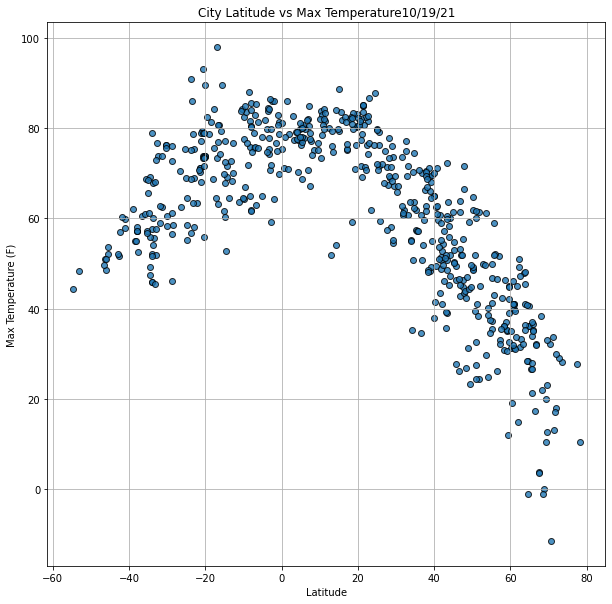

In [25]:
# import the time module
import time
#build a scatter plot for max temp and lats
plt.figure(figsize=(10,10))
plt.scatter(lats, max_temps, marker="o", linewidth=1, alpha=0.8, edgecolor="black", label="cities")

#plot labels
plt.title("City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig1.png")

plt.show()

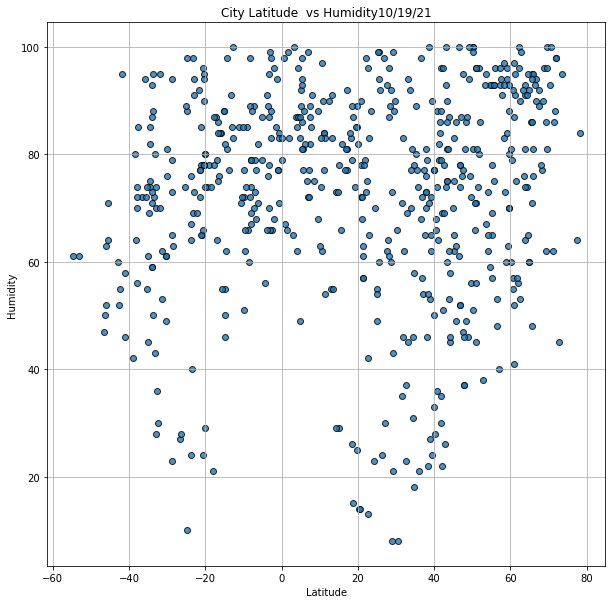

In [26]:
# import the time module
import time
#build a scatter plot for max temp and lats
plt.figure(figsize=(10,10))
plt.scatter(lats, humidity, marker="o", linewidth=1, alpha=0.8, edgecolor="black", label="cities")

#plot labels
plt.title("City Latitude  vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig2.png")

plt.show()

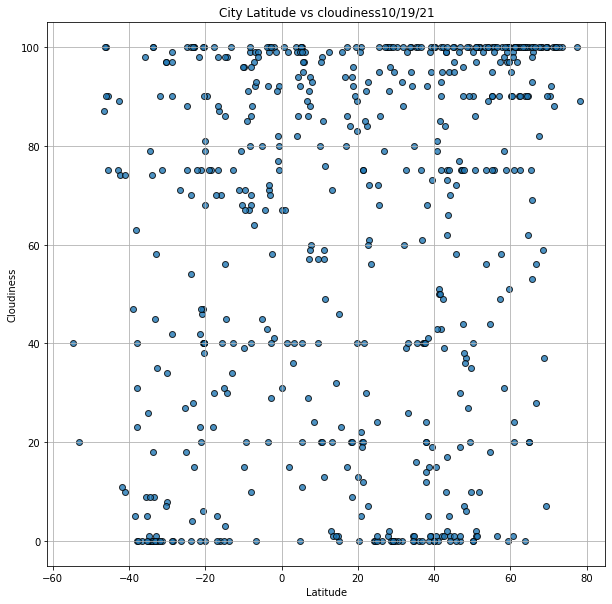

In [27]:
# import the time module
import time
#build a scatter plot for max temp and lats
plt.figure(figsize=(10,10))
plt.scatter(lats, cloudiness, marker="o", linewidth=1, alpha=0.8, edgecolor="black", label="cities")

#plot labels
plt.title("City Latitude vs cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig3.png")

plt.show()

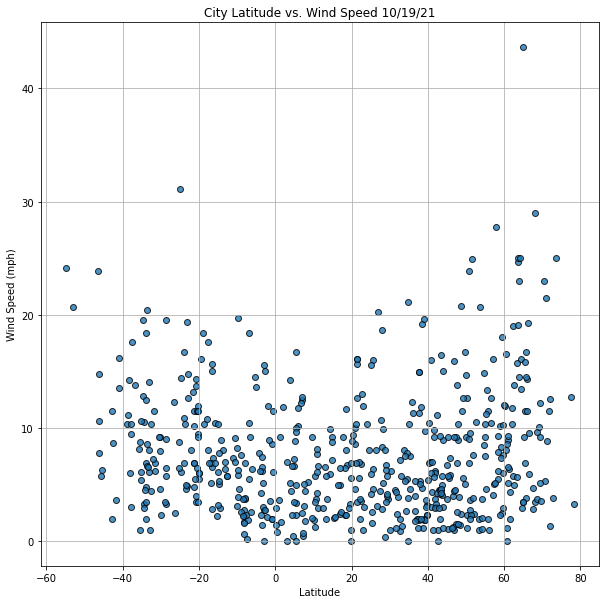

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.figure(figsize=(10,10))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

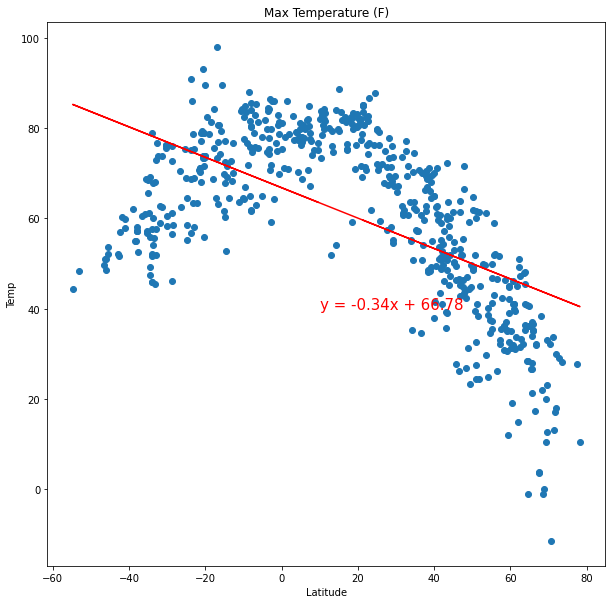

In [36]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10,10))
# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.grid=(True)
plt.show()

In [55]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    plt.figure(figsize=(10,10))
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.grid=(True)
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [45]:
index13 = city_data_df.loc[13]
index13

city_ID                        13
City                      Rikitea
Country                        PF
Date          2021-10-18 23:54:43
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    75.33
Humidity                       73
Cloudiness                     15
Wind Speed                  19.35
Name: 13, dtype: object

In [49]:
city_data_df.loc[city_data_df["Lat"] >= 0].head()

,city_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bandarbeyla,SO,2021-10-18 23:54:38,9.4942,50.8122,76.75,88,57,9.24
1,1,Kapoeta,SS,2021-10-18 23:54:38,4.7717,33.5903,79.79,49,92,0.45
3,3,Ponta Delgada,PT,2021-10-18 23:54:39,37.7333,-25.6667,70.52,73,20,14.97
6,6,Victoria,HK,2021-10-18 23:54:38,22.2855,114.1577,76.32,75,84,1.99
8,8,Nalgonda,IN,2021-10-18 23:54:41,17.0500,79.2667,75.09,81,86,4.94


In [50]:
#create north and south data frames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

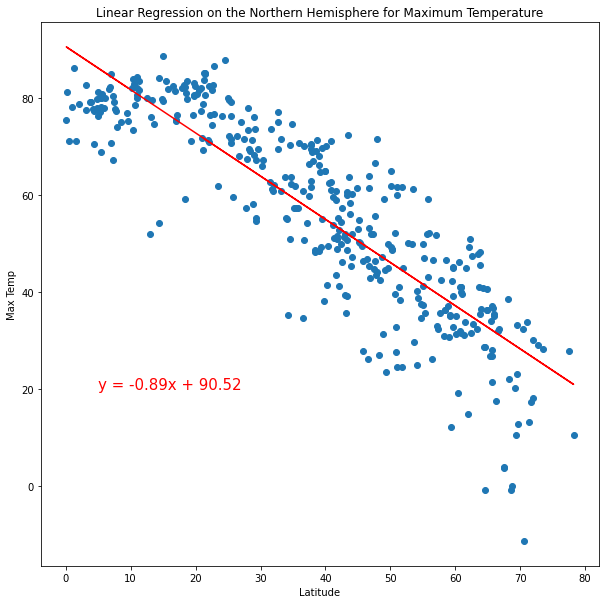

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,20))

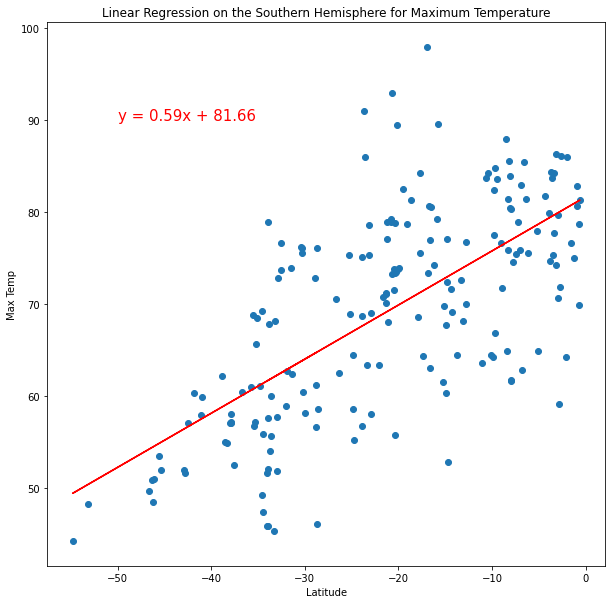

In [64]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [76]:
(_,_,r_value_south,_,_) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
(_,_,r_value_north,_,_) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
print(f"the R_value for southern Hemi is: {r_value_south} and the nothern is: {r_value_north}")

the R_value for southern Hemi is: 0.6655046549483962 and the nothern is: -0.8680502295712305


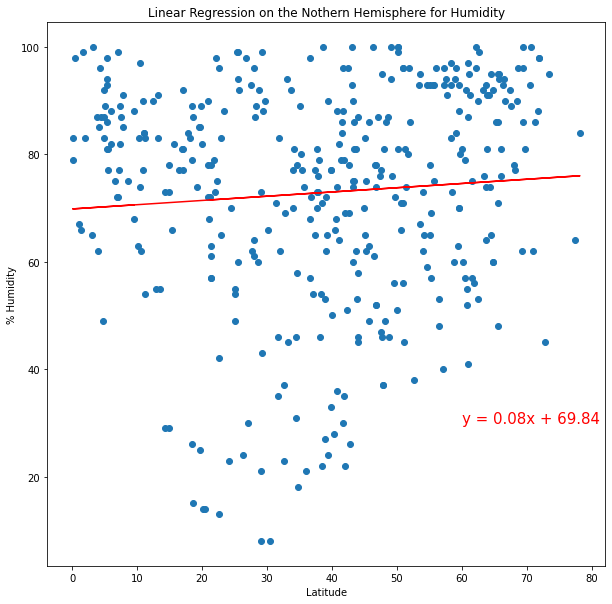

In [78]:
# Linear regression on the southern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nothern Hemisphere for Humidity', '% Humidity',(60,30))

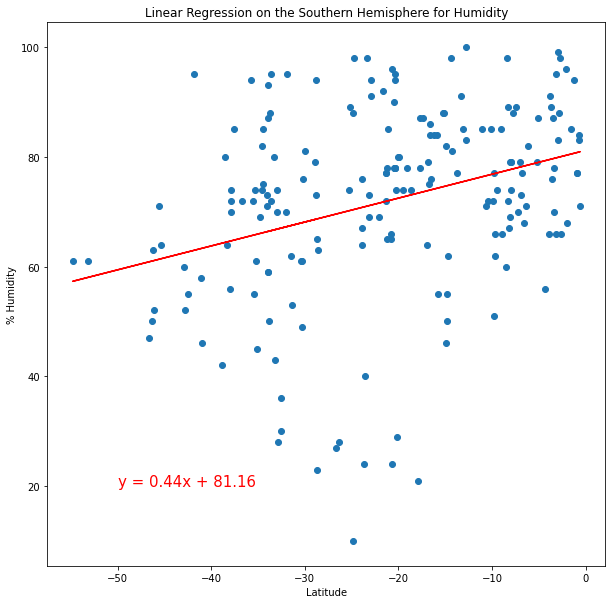

In [80]:
# Linear regression on the southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Humidity', '% Humidity',(-50,20))

In [82]:
(_,_,r_value_south,_,_) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
(_,_,r_value_north,_,_) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"the R_value for southern Hemi is: {r_value_south} and the nothern is: {r_value_north}")

the R_value for southern Hemi is: 0.32063008856859615 and the nothern is: 0.07526411862232947


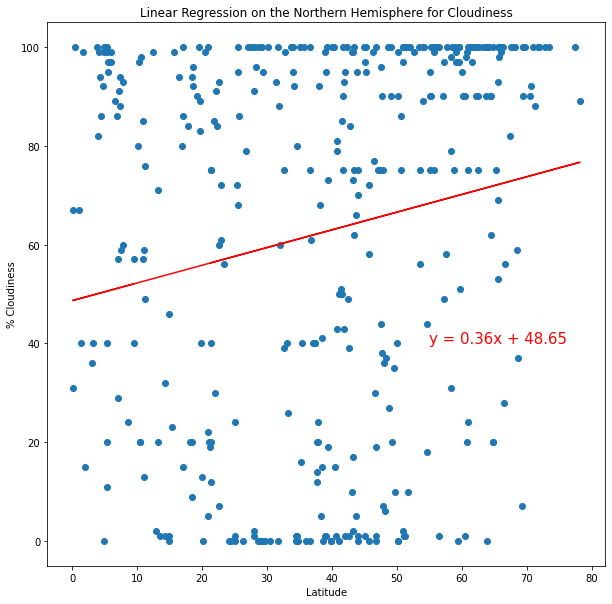

In [86]:
# Linear regression on the North Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', '% Cloudiness',(55,40))

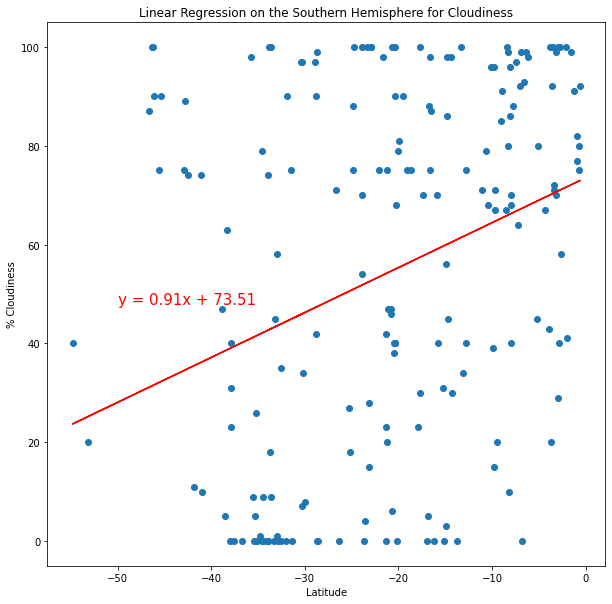

In [89]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', '% Cloudiness',(-50,48))

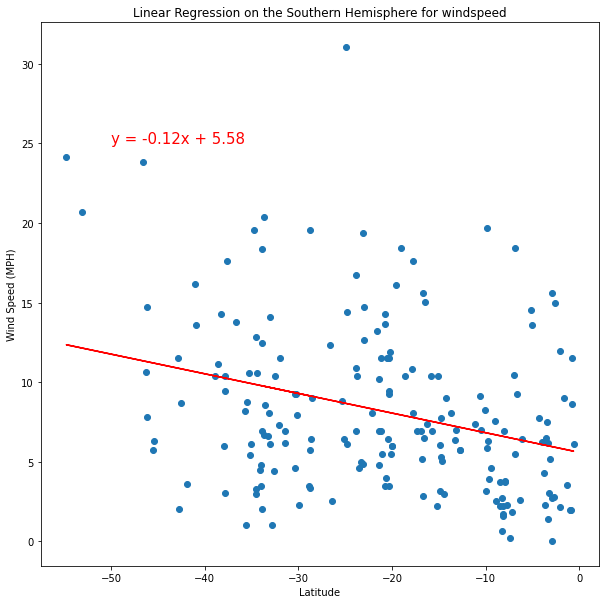

In [92]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for windspeed', 'Wind Speed (MPH)',(-50,25))

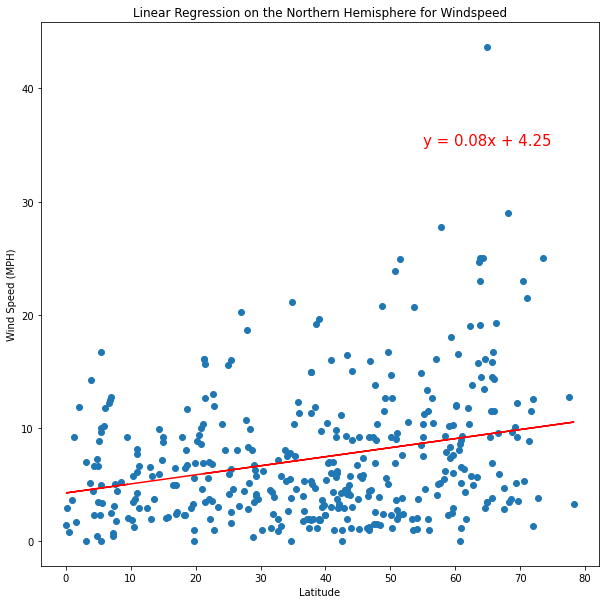

In [94]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Windspeed', 'Wind Speed (MPH)',(55,35))

In [95]:
#find the r_values for windspeed
(_,_,r_value_south,_,_) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
(_,_,r_value_north,_,_) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"the R_value for southern Hemi is: {r_value_south} and the nothern is: {r_value_north}")

the R_value for southern Hemi is: -0.3040178345441015 and the nothern is: 0.27059036893406735
